<a href="https://colab.research.google.com/github/mysticgrud/magshimim/blob/class-20/%D7%A2%D7%95%D7%AA%D7%A7_%D7%A9%D7%9C_Copy_of_%D7%AA%D7%A8%D7%92%D7%99%D7%9C_%D7%9B%D7%99%D7%AA%D7%94_%D7%9E%D7%97%D7%91%D7%A8%D7%AA_%D7%97%D7%A0%D7%99%D7%9A_%D7%91%D7%A0%D7%99%D7%94_%D7%95%D7%94%D7%AA%D7%A0%D7%A1%D7%95%D7%AA_%D7%A2%D7%9D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

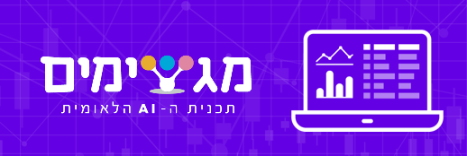

<div dir="rtl">
<font color="Grey">
<center>
שיעור 20
</font>
</div>

<div dir="rtl">
<font color="Grey">
זכרו ליצור עותק של מחברת זו, לשנות את שמו ולעבוד על העותק האישי שלכם.
<br>
בהצלחה!
</font>
</div>

<div dir= rtl>


# **תרגיל כיתה- התנסות עם KNN**

<div dir=rtl>




הריצו את הקוד הבא כדי לטעון את ה-Dataset שנבנה במיוחד באמצעות שיטות סטטיסטיות (הניחו שהנתונים תקינים).

In [ ]:
#@title הריצו אותי
import pandas as pd
import seaborn as sns
import numpy as np

np.random.seed(42)
heights_m = np.round(np.random.normal(loc=180, scale=5, size=100), 1)
weights_m = np.round(np.random.normal(loc=75, scale=5, size=100), 1)
heights_fm = np.round(np.random.normal(loc=170, scale=5, size=100), 1)
weights_fm = np.round(np.random.normal(loc=65, scale=5, size=100), 1)

df_m = pd.DataFrame({'height': heights_m, 'weight': weights_m, 'gender': 'Male'})
df_fm = pd.DataFrame({'height': heights_fm, 'weight': weights_fm, 'gender': 'Female'})
df=pd.concat([df_fm,df_m])
df = df.reset_index()
df

,index,height,weight,gender
0,0,171.8,60.9,Female
1,1,172.8,62.2,Female
2,2,175.4,68.7,Female
3,3,175.3,68.1,Female
4,4,163.1,64.9,Female
...,...,...,...,...
195,95,172.7,76.9,Male
196,96,181.5,70.6,Male
197,97,181.3,75.8,Male
198,98,180.0,75.3,Male


<div dir=rtl>


בואו נתחיל!

<div dir="rtl">

**סעיף 0**

צרו היסטוגרמה שמציגה את הגבהים לפי חלוקה בין גברים לנשים

<Axes: xlabel='height', ylabel='Count'>

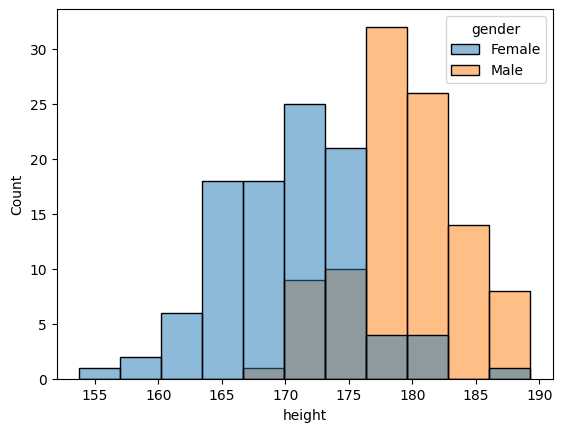

In [ ]:
#השלימו כאן קטע קוד
#------------
sns.histplot(data=df, x='height', hue='gender')
#------------

<div dir=rtl>

**סעיף 1**


צרו גרף scatter המציג את הגובה על ציר x, את המשקל על ציר y ואת המין ב-2 צבעים שונים (צבע אחד לכל מין)

רמז:
 הזכרו ב-hue

<div dir="rtl">

**סעיף 2**


 מה ניתן לראות מהגרף? איך לדעתכם המודל יכול לסווג כאן נתונים על סמך הנתונים שמוצגים כאן?

 **כתבו תשובה כאן:**
* בתמונה מתחת ניתן לראות את חברתה הטובה ביותר של המתכנתת בזמן שיעור מגשימים

* ניתן לראות בגרף שגברים שמנים וגבוהים יותר מנשים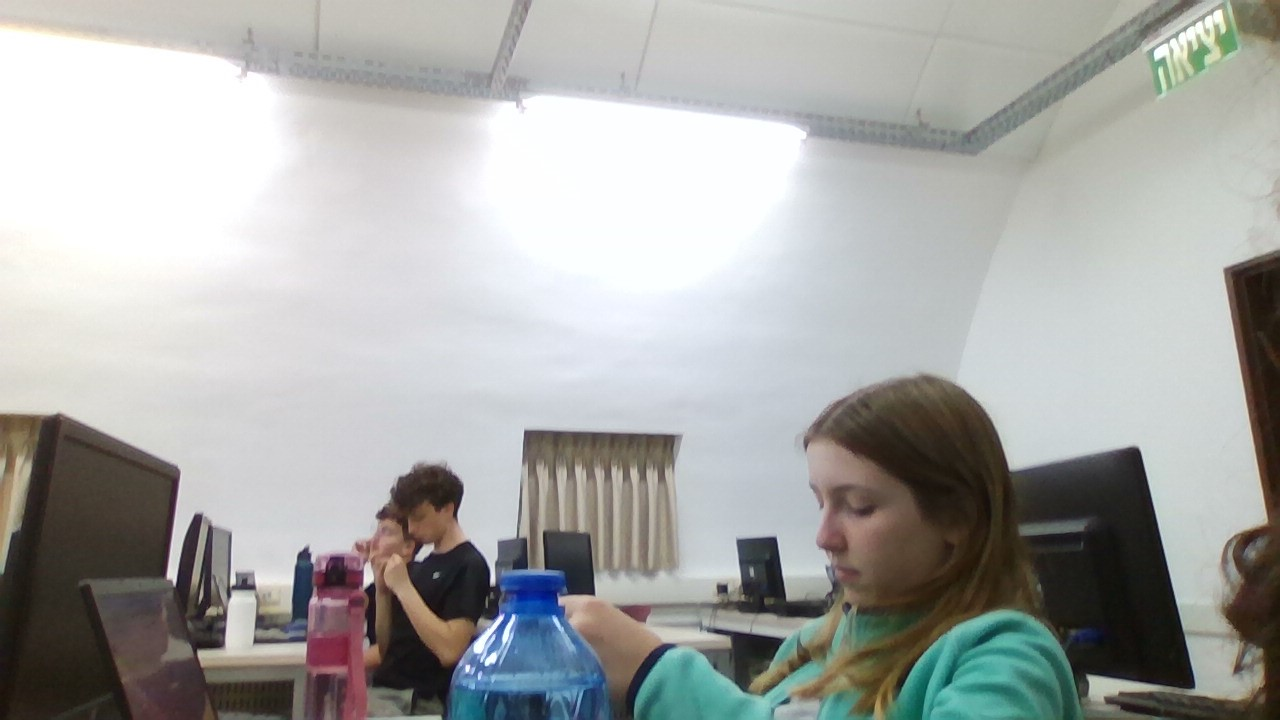

<Axes: xlabel='height', ylabel='weight'>

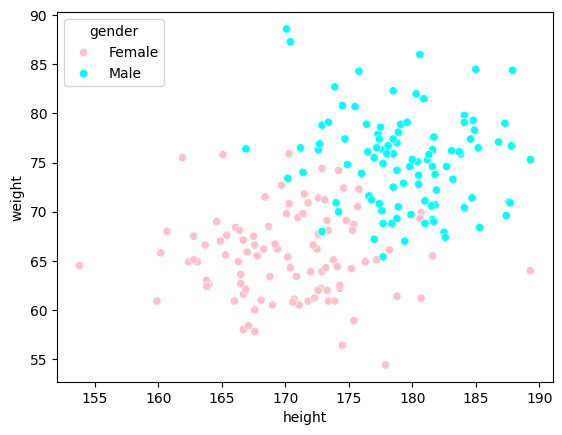

In [ ]:
#השלימו כאן קטע קוד
#------------
sns.scatterplot(x='height', y='weight', hue='gender', data=df, palette={'Female': 'pink', 'Male': 'cyan'})
#------------

<div dir="rtl">

**סעיף 3**


נתחיל בבניית KNN עם פיצ'ר יחיד (כלומר KNN שמתיחס רק לגובה ולא למשקל) ממש כמו שעשינו בדוגמא בכיתה.

צרו **פונקציה בשם add_distance_column** שמקבלת פרמטר height ומוסיפה ל-df עמודה המייצגת את המרחק של הגבהים מ-height.

שימו לב שכאשר אנחנו מחשבים את המרחק בין 2 גבהים אנחנו צריכים לשים את **תוצאת  החיסור בערך מוחלט**, כי מרחק לא יכול להיות שלילי. לכן ניתן להשתמש בפונקציית [abs](https://www.geeksforgeeks.org/abs-in-python/)

In [ ]:
#השלימו כאן קטע קוד
#------------
def add_distance_column(height):
    df['distance'] = abs(df['height'] - height)
    return df['distance']

#-----------

<div dir="rtl">

הריצו ובדקו אם הפונקציה שכתבתם עובדת

In [ ]:
add_distance_column(172)
df

,index,height,weight,gender,distance
0,0,171.8,60.9,Female,0.2
1,1,172.8,62.2,Female,0.8
2,2,175.4,68.7,Female,3.4
3,3,175.3,68.1,Female,3.3
4,4,163.1,64.9,Female,8.9
...,...,...,...,...,...
195,95,172.7,76.9,Male,0.7
196,96,181.5,70.6,Male,9.5
197,97,181.3,75.8,Male,9.3
198,98,180.0,75.3,Male,8.0


<div dir="rtl">

 **סעיף 4**

צרו **פונקציה הנקראת nearest_3_neighbors_most_common_gender**.

הפונקציה תקבל Dataframe שכוללת את עמודת המרחק שיצרנו בסעיף הקודם.
על הפונקציה להחזיר את המין הכי שכיח מבין 3 השורות בטבלה בעלי המרחק הקצר בעמודה distance.
בכדי ליצור את הפונקציה עליכם לחלק אותה ל-3 שלבים ובכך להקל על יצירתה:

**שלב א:**
על מנת לדעת מהו המרחק הכי קצר , נרצה למיין את הנתונים לפי עמודה distance. חשבו איזה פונקציה תעזור לנו בכך.
נשים את התשובה במשתנה sorted_by_distance.

**שלב ב:**
נבחר את 3 השורות הראשונות בטבלה שהתקבלה ונשמור את התוצאה במתשנה nearest_3_neighbors, כי אלו בעצם שלושת השכנים הכי קרובים במרחק לגובה ששלחנו לפונקציה הקודמת.

**שלב ג:**
נימצא את השכיח בDF הקטן שהתקבל לנו בשלב הקודם ונחזיר את המין השכיח.


In [ ]:
#השלימו כאן קטע קוד - ננסה רק את שלב א ללא הפונקציה עדיין
#------------
sorted_by_distance = df.sort_values(by='distance')

#------------

In [ ]:
#השלימו כאן קטע קוד השלימו שלב , עם שימוש במה שעשיתם בשלב א
#------------
nearest_3_neighbors = sorted_by_distance.head(3)

#------------

In [ ]:
# השלימו כאן קטע קוד - הרכיבו את הפונקציה הסופית על סמך השלבים הקודמים
#------------
def most_common_gender(nearest_3_neighbors):
    most_common_gender = nearest_3_neighbors['gender'].value_counts().idxmax()
    return most_common_gender

result = most_common_gender(nearest_3_neighbors)
print(result)
#------------

Female


<div dir=rtl>

**סעיף 5**

בואו נחבר בין 2 הפונקציות שיצרנו ,

צרו **פונקציה בשם knn3** שמקבלת פרמטר גובה ומחזירה את הסיווג לפי מין (Male או Female) כאשר K=3.

**תזכורת**- K הוא מספר השכנים (הנתונים הכי דומים) של הנתון אותו נרצה לסווג (K אינו מספר הפיצ'רים/משתנים!)

רמז:
היעזרו בפונקציות שיצרתם ב-2 הסעיפים הקודמים

In [ ]:
#השלימו כאן קטע קוד
#------------
def knn3(df, height):
    df['distance'] = abs(df['height'] - height)
    sorted_by_distance = df.sort_values(by='distance')
    nearest_3_neighbors = sorted_by_distance.head(3)
    most_common_gender = nearest_3_neighbors['gender'].mode()[0]
    return most_common_gender

result1 = knn3(df, 171)
print(result1)

#------------

Female


<div dir="rtl">

**סעיף 6**

התנסו בפונקציה שיצרתם - קראו לה עם ערכי height שונים והדפיסו את הפלט:
180, 100 , 120 , 177 , 165

הוסיפו 3 ערכים לבחרתכם.


**שאלו את עצמכם-**
האם הפלט הגיוני?
האם הפלט תואם את ההנחה שהצגתם בגרף סקאטר?
אתם יכולים להיעזר בגרף BOXPLOT על מנת קצת להבין את גבולות המשתנה ולבדוק האם התוצאות הגיוניות


In [ ]:
#השלימו כאן קטע קוד
#------------
print(knn3(df, 165))
print(knn3(df, 177))
print(knn3(df, 120))
print(knn3(df, 100))
print(knn3(df, 180))

#------------

Female
Male
Female
Female
Male


<div dir="rtl">

**סעיף 7**

צרו פונקציה בשם knn_K שמקבלת פרמטרים height ו-K ומחזירה את הסיווג לפי מין (Male או Female) כאשר הגובה אותו אנחנו מסווגים הוא height ואנחנו מסווגים אותו באמצעות האלגוריתם שלמדנו כאשר מספר השכנים הוא K.

רמז:

* הפונקציה הזאת היא כמו KNN3 רק שהפעם K ניתן לבחירת המשתמש.
* נסו הפעם להשתמש בשרשור פקודות

In [ ]:
#השלימו כאן קטע קוד
#------------
def knn_K(df, height, K):
    df['distance'] = abs(df['height'] - height)
    sorted_by_distance = df.sort_values(by='distance')
    nearest_K_neighbors = sorted_by_distance.head(K)
    most_common_gender = nearest_K_neighbors['gender'].mode()[0]
    return most_common_gender


#------------

<div dir="rtl">

**סעיף 8**

התנסו בפונקציה שיצרתם - קראו לה עם ערכי height ו-K שונים והדפיסו את התוצאות.

נסו את הערכים הבאים:

* גובה 175 עם K=3
* גובה 175 עם K=100
* K=200 עם גובה 195
* K=200 עם גובה 155
* נסו עוד 3 קריאות ל-knn_k עם קומבינציות משלכם שאתם המצאתם.





In [ ]:
#השלימו כאן קטע קוד
#------------
print(knn_K(df, 175, 3))
print(knn_K(df, 175, 100))
print(knn_K(df, 195, 200))
print(knn_K(df, 155, 200))

print(knn_K(df, 180, 34))
print(knn_K(df, 171, 5))
print(knn_K(df, 125, 20))

#------------

Female
Male
Female
Female
Male
Female
Female


<div dir="rtl">

**סעיף 9**

**א. שאלו את עצמכם:**

האם הפלט הגיוני?  איך שינוי ערך הK משפיע?

**כתבו תשובה כאן:**




**ב. שאלו את עצמכם:**
הדפיסו תוצאה של הפונקציה עבור 2 המקרים הבאים:
ערך K שלילי כלשהו
ערך K גבוהה מכמות הנתונים שיש לנו.

האם המודל עדיין מצליח לסווג? האם הסיווג נכון לדעתכם? אם לא מדוע?
אם ישנה בעיה או סיווג לא נכון איך נתמודד איתה?

**כתבו תשובה כאן:**





In [ ]:
#השלימו כאן קטע קוד
#------------
''' הפלט הינו הגיוני לפי דעתי כיוון שהוא מתאים עם מה שידוע לנו על הנתונים, שבאופן כללי גברים גבוההים יותר מנשים.
ערך הK משפיע בכך שהוא הולך ליותר שכנים שקרובים ובכך הוא יכול להשפיע על התוצאנ לפי מי הם השכנים.
ככל שערך הK גדול יותר כך התןוצאה תיהיה "חלקה" יותר, כלומר יותר גנרי
ככך שערך הK קטן יותר כך התוצאה תיהיה יותר ספציפית ומפורטת.
'''

print(knn_K(df, 171, 1000000000000000000))
print(knn_K(df, 171, -5))
#זה רץ אבל בגלל שאילו ערכים לא הגיוניים התוצאות אינן משנות ואינן הגיוניות בכלל
#------------

Female
Female


<div dir="rtl">

**בונוס: סעיף 10**
**חלק א:**
בנו פונקציה שתבצע סיווג KNN כפי שראיתם עכשיו אך רק לפי משקל. כלומר הפונקציה תקבל את המשקל ותחזיר את הסיווג הרלוונטי.
לא לשכוח לעשות פונקציה חדשה לחישוב המרחקים עבור המשקל שבה תשתמשו.

נסו והרציו את הפונקציה עם הדוגמאות למשקלים הבאים:


In [ ]:
#השלימו כאן קטע קוד
#------------



#------------

<div dir="rtl">

**חלק ב:**
נסו ובדקו את הפונקציה עם הדוגמאות למשקלים הבאים:
55, 100, 65 , 80, 70

הוספיו עוד 3 דוגמאות שהמצאתם.

בחרו K כרצונכם מעל 3.

האם הסיווג שיוצא נראה לכם הגיוני?

**כתבו תשובה כאן:**



In [ ]:
#השלימו כאן קטע קוד
#------------

#------------

<div dir="rtl">

**חלק ג:**
יש לנו אישה עם משקל 65 וגובה 188, בדקו איך היא תסווג רק על סמך הגובה שלה, האם הסיווג נכון?
האם ניתן להחליט רק על סמך גובה או משקל?

חפשו עוד דוגמה כזאת לפי גרף הסקאטר, והציגו אותה בקוד.

**כתבו תשובה כאן:**


In [ ]:
#השלימו כאן קטע קוד
#------------


#השלימו כאן קטע קוד לעוד דוגמה
#------------



<div dir="rtl">

**שאלה למחשבה:**
על מנת לסווג גבר או אישה איזה פיצרים קריטיים עוד חשובים שיופיעו בDF? האם גיל הוא חשוב? אורך שיער? חשבו על מאפיינים אחרים והסבירו.

**כתבו תשובה כאן:**
המאפיינים האלה לא חשובים כי צבע שיער וגיל זה לא מה שקשור למגדר בשום אופן אלה לגנטיקה באופן כללי




<div dir="rtl">

זהו סיימתם כל הכבוד!!!!!

<div dir="rtl" align="center">

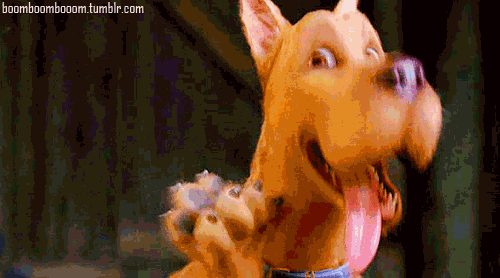